In [1]:
import pandas as pd
df=pd.read_csv('d:/data/ontime/2006.csv')
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,45,13,0,NaN,0,0,0,0,0,0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,...,27,19,0,NaN,0,0,0,0,0,0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,4,11,0,NaN,0,0,0,0,0,0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,...,16,10,0,NaN,0,0,0,0,0,0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,...,27,12,0,NaN,0,0,0,0,0,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7141922 entries, 0 to 7141921
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               int64
TaxiOut              int64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         int64
WeatherDelay         int64
NASDelay             int64
SecurityDelay        int64
LateAircraftDelay    int64
dtypes: float64(7), int64(17), object(5)
memory usage: 1.5+ GB


In [14]:
df2=df.loc[:,['Distance','DepDelay','ArrDelay']]
df2.shape #데이터의 차원

(7141922, 3)

In [15]:
df3=df2.dropna(axis=0) #NA가 포함된 행을 삭제
df3.shape

(7003802, 3)

In [16]:
#귀무가설 : 운항거리와 출발지연시간은 관계가 없다
#대립가설 : 운항거리와 출발지연시간은 관계가 있다
x=df3["Distance"] #독립변수 - 운항거리
y=df3["DepDelay"] #종속변수 - 출발지연시간

In [17]:
from scipy import stats
x2=df3["Distance"].values
y2=df3["DepDelay"].values
result=stats.linregress(x2,y2) #단순회귀분석
result #p-value,rvalue 확인
#pvalue=2.7068019183876473e-34 => 95%,99% 신뢰수준 하에서 유의
#rvalue=0.004614144048285657 설명력이 거의 없는 모형
#귀무가설 기각, 대립가설 채택
#결론 : 운항거리와 출발지연시간은 관계가 있다
#설명력은 거의 없는 모형

LinregressResult(slope=0.0002677790647677275, intercept=9.863462328549037, rvalue=0.004614144048285657, pvalue=2.7068019183876473e-34, stderr=2.1928755268205118e-05)

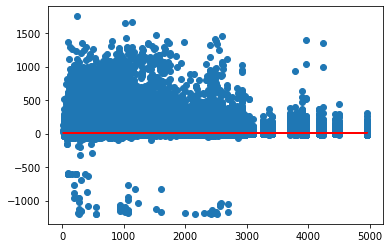

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
slope,intercept,r_value,p_value,stderr=stats.linregress(x2,y2)
plt.scatter(x2,y2) #산점도
plt.plot(x2,slope*x2+intercept,c='red') #회귀선